Unsupervised learning : K-means cluster
 - To predict optimum number of clusters & represent visually

In [1]:
# import dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/Neha1529/Tasks/master/Data%20for%20tasks/Iris.csv'
# read the data into a dataframe

iris = pd.read_csv(url)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
# to check for missing values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

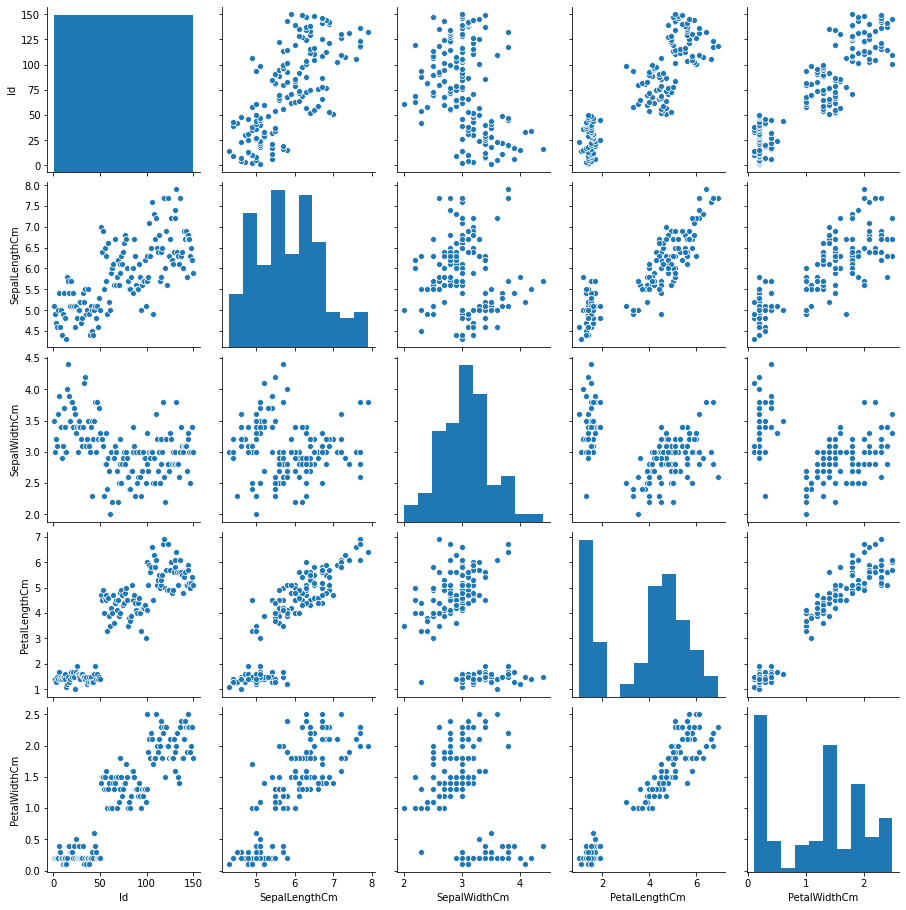

In [5]:
g = sns.pairplot(iris)

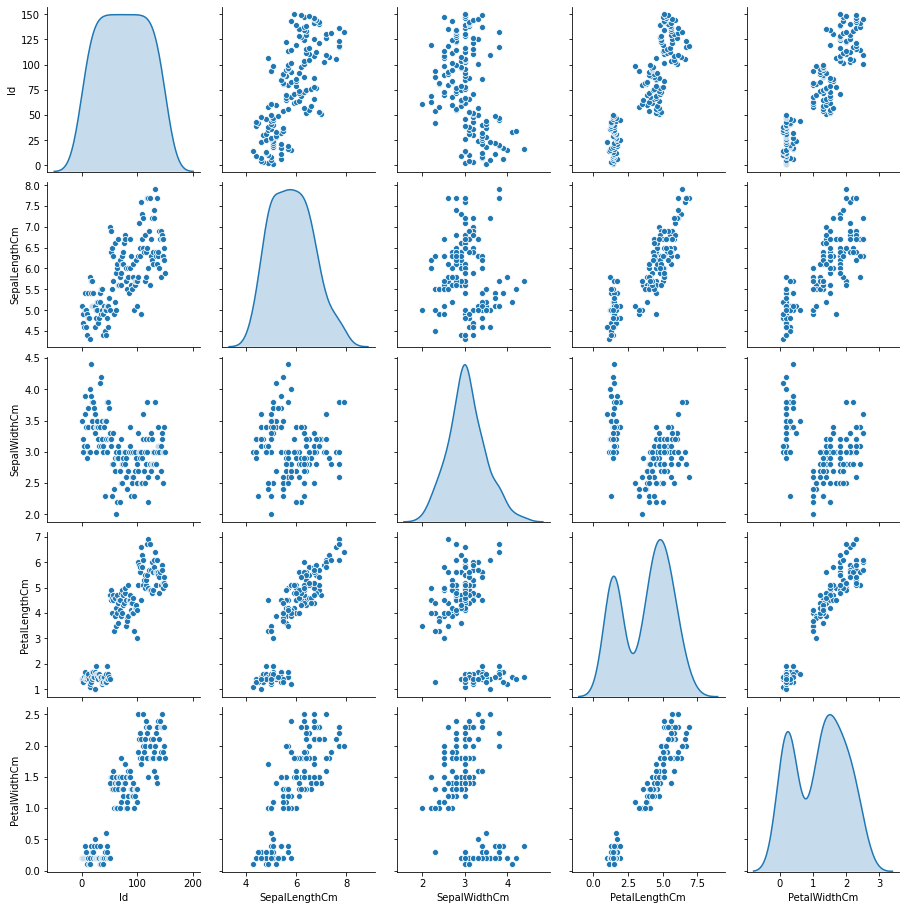

In [6]:
g = sns.pairplot(iris , diag_kind = 'kde')

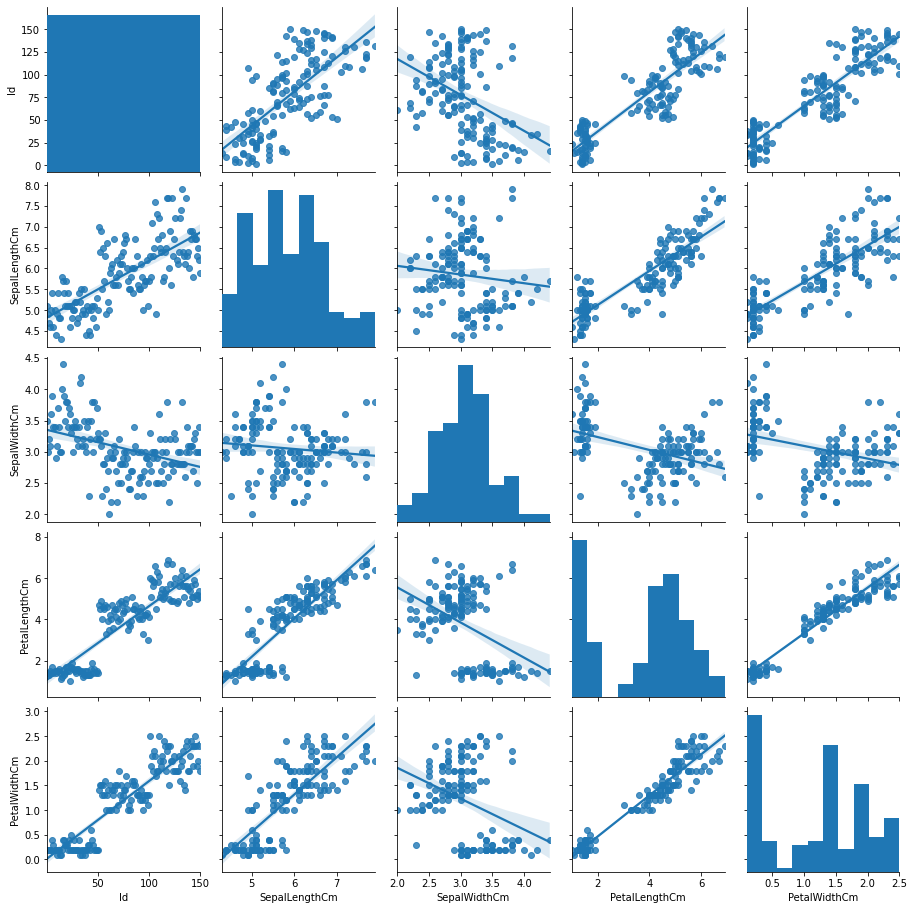

In [7]:
g = sns.pairplot(iris,kind = "reg")

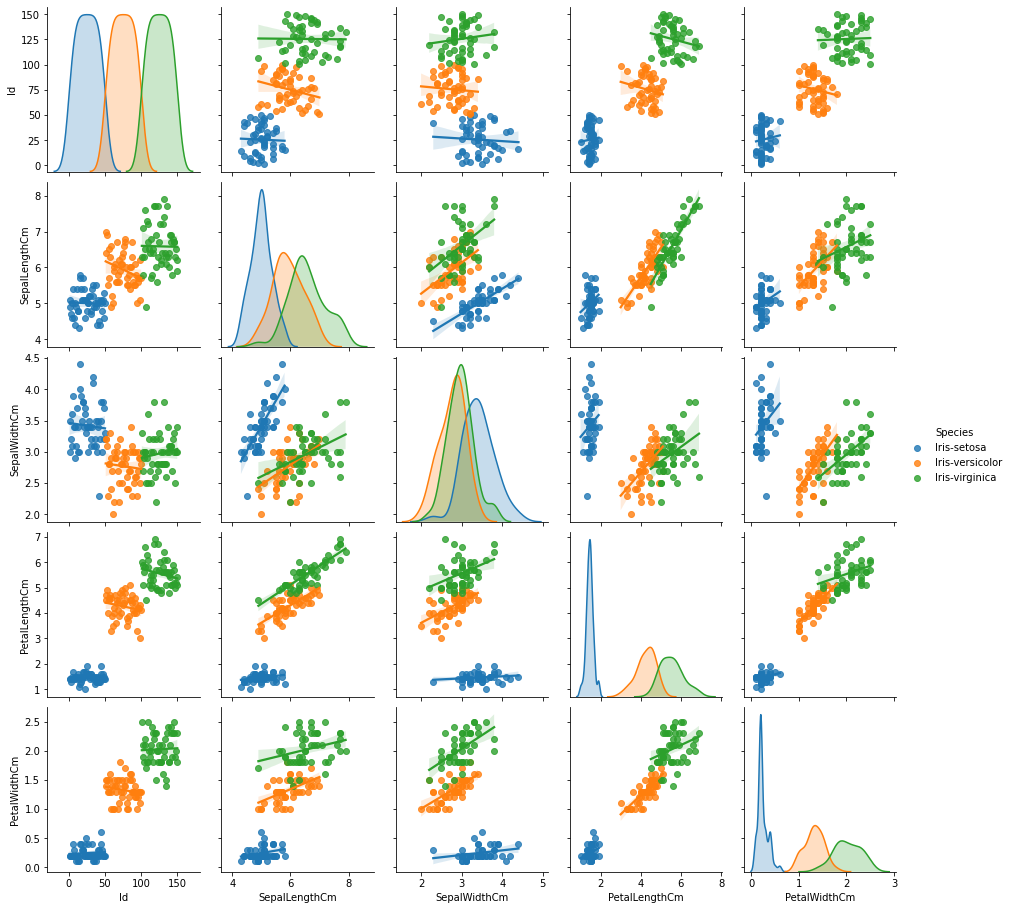

In [8]:
g = sns.pairplot(iris, kind = "reg", hue = 'Species', diag_kind = 'kde')

In [9]:
# optimum number of clusters

x = iris.iloc[:,[1,2,3,4]].values

within_inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,n_init = 10)
  kmeans.fit(x)
  within_inertia.append(kmeans.inertia_)
print(within_inertia)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.53558205128205, 39.18020672938385, 34.31265004600874, 29.906856755965457, 28.11306887717758, 26.296539473684213]


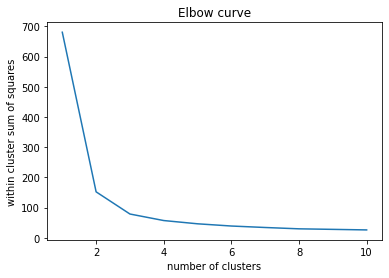

In [10]:
# Plot possible number of clusters vs within cluster sum of squares to find optimum number of clusters

plt.plot(range(1,11),within_inertia)
plt.xlabel("number of clusters")
plt.ylabel("within cluster sum of squares")
plt.title("Elbow curve")
plt.show()

The plot of Within cluster sum of squares vs the number of clusters show us an elbow point at 3. So, we can conlude that 3 is the best value for k to be used to create the final model.This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [11]:
# creating final model with n = 3

kmeans = KMeans(n_clusters = 3, n_init = 10, max_iter = 300)
prediction = kmeans.fit_predict(x)

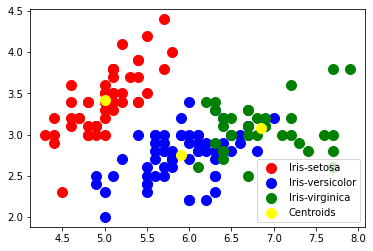

In [12]:
# visualizing the clusters

plt.scatter(x[prediction== 0,0],x[prediction== 0,1], s =100, c ='red',label='Iris-setosa')
plt.scatter(x[prediction== 1,0],x[prediction== 1,1], s =100, c ='blue',label='Iris-versicolor')
plt.scatter(x[prediction== 2,0],x[prediction== 2,1], s =100, c ='green',label='Iris-virginica')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

